<a href="https://www.kaggle.com/code/salilapte/data-mining-comment-classifier?scriptVersionId=211647233" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Logistic Regression Accuracy: 0.9943148583332478
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     61112
         1.0       1.00      0.99      0.99     36335

    accuracy                           0.99     97447
   macro avg       0.99      0.99      0.99     97447
weighted avg       0.99      0.99      0.99     97447



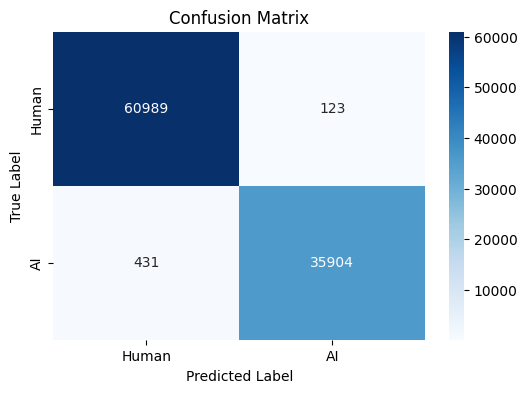

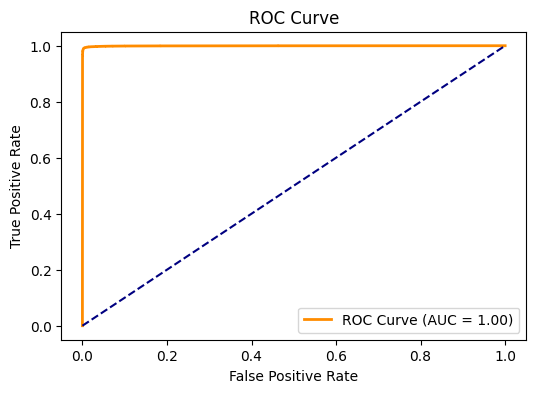

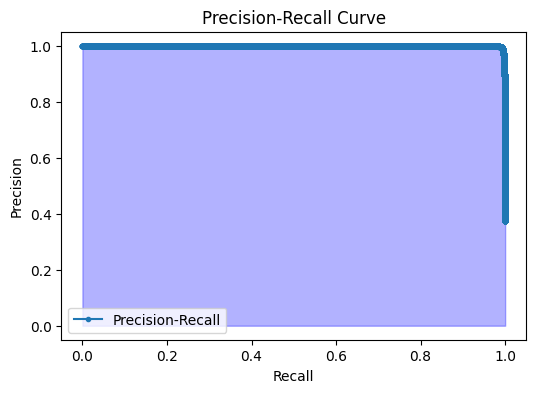

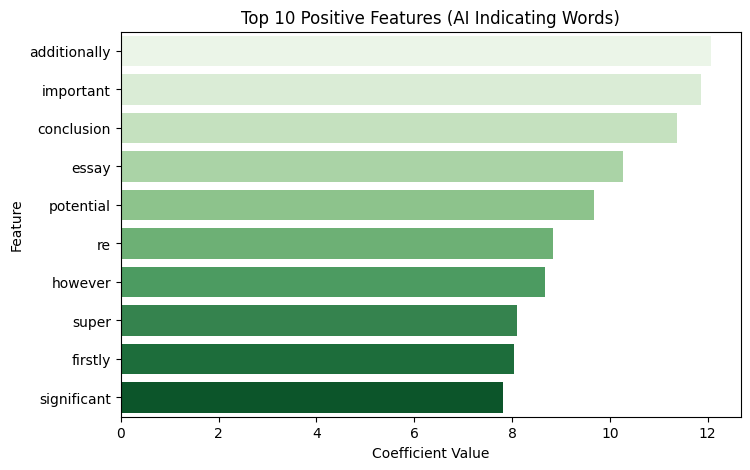

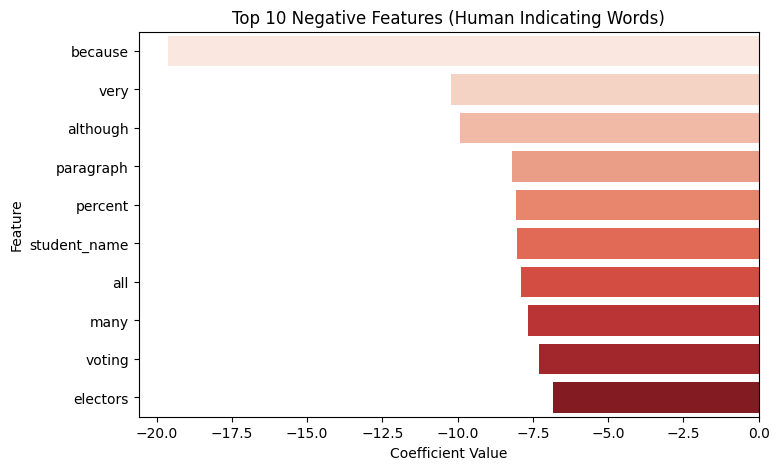

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


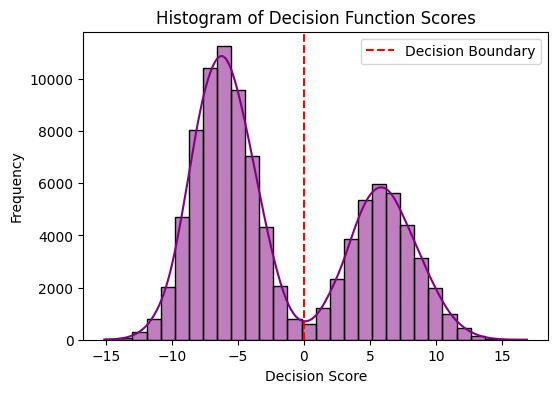

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    precision_recall_curve,
)

# Load the dataset
df = pd.read_csv('/kaggle/input/ai-human/AI_Human.csv')

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)  # Reduce features for efficiency
X = vectorizer.fit_transform(df['text'])
y = df['generated']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000, solver='liblinear')  # Ensure solver compatibility
log_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = log_model.predict(X_test)
y_score = log_model.decision_function(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# **Visualization 1: Confusion Matrix**
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Visualization 2: ROC Curve**
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# **Visualization 3: Precision-Recall Curve**
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label='Precision-Recall')
plt.fill_between(recall, precision, alpha=0.3, color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# **Visualization 4: Top Positive and Negative Features**
# Extract feature coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = log_model.coef_[0]

# Combine features and coefficients into a DataFrame
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
top_positive = coef_df.nlargest(10, 'Coefficient')
top_negative = coef_df.nsmallest(10, 'Coefficient')

# Plot top positive coefficients
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=top_positive, palette='Greens')
plt.title('Top 10 Positive Features (AI Indicating Words)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Plot top negative coefficients
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=top_negative, palette='Reds')
plt.title('Top 10 Negative Features (Human Indicating Words)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# **Visualization 5: Histogram of Predictions**
plt.figure(figsize=(6, 4))
sns.histplot(y_score, kde=True, bins=30, color='purple')
plt.axvline(0, color='red', linestyle='--', label='Decision Boundary')
plt.title('Histogram of Decision Function Scores')
plt.xlabel('Decision Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()